In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time

In [2]:
num_words = 10000

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [5]:
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
def build_model(layer_count=2, layer_size=16, loss="binary_crossentropy", activation="relu"):
    model = keras.Sequential([layers.Dense(layer_size, activation=activation)]*layer_count
        + [layers.Dense(1, activation="sigmoid")])
    model.compile(optimizer="rmsprop", loss=loss, metrics=["accuracy"])
    return model

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
def train(model, epochs=20, batch_size=512, verbose=0, plot=True):
    start = time.time()
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        verbose=verbose)
    end = time.time()
    print(f"elapsed {(end - start):.2f}s")
    for key in ["loss", "accuracy", "val_loss", "val_accuracy"]:
        print(f"{key}[0]: {history.history[key][0]}, {key}[-1]: {history.history[key][-1]}")
    if plot:
        history_dict = history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        epochs = range(1, len(loss_values) + 1)
        plt.plot(epochs, loss_values, "bo", label="Training loss")
        plt.plot(epochs, val_loss_values, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        plt.clf()
        acc = history_dict["accuracy"]
        val_acc = history_dict["val_accuracy"]
        plt.plot(epochs, acc, "bo", label="Training acc")
        plt.plot(epochs, val_acc, "b", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

elapsed 3.91s
loss[0]: 0.4981759786605835, loss[-1]: 0.09160588681697845
accuracy[0]: 0.7998666763305664, accuracy[-1]: 0.9774666428565979
val_loss[0]: 0.3932647109031677, val_loss[-1]: 0.3044162690639496
val_accuracy[0]: 0.8650000095367432, val_accuracy[-1]: 0.882099986076355


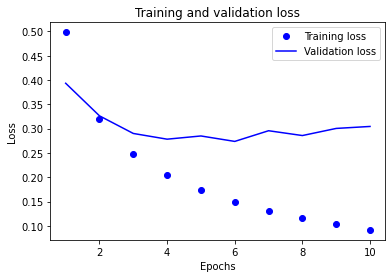

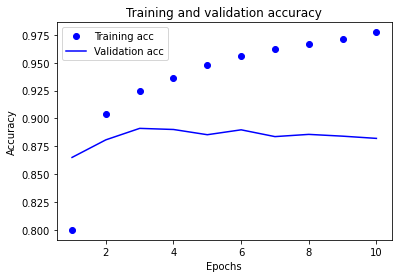

In [10]:
train(build_model(), epochs = 10)

elapsed 3.66s
loss[0]: 0.47667616605758667, loss[-1]: 0.06487271934747696
accuracy[0]: 0.7914000153541565, accuracy[-1]: 0.9847999811172485
val_loss[0]: 0.37224453687667847, val_loss[-1]: 0.34723103046417236
val_accuracy[0]: 0.8585000038146973, val_accuracy[-1]: 0.8762000203132629


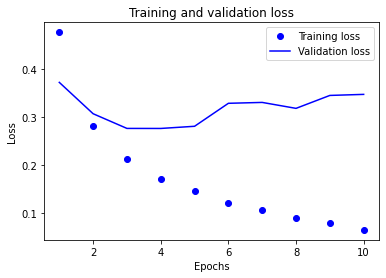

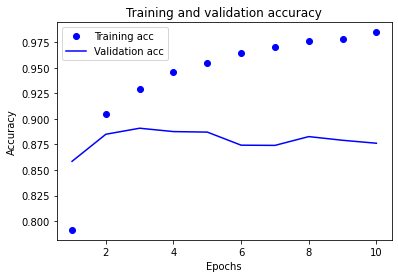

In [11]:
train(build_model(layer_count = 3, layer_size = 32), epochs = 10)

elapsed 3.68s
loss[0]: 0.4635835886001587, loss[-1]: 0.054663173854351044
accuracy[0]: 0.7988666892051697, accuracy[-1]: 0.9866666793823242
val_loss[0]: 0.33500736951828003, val_loss[-1]: 0.38083526492118835
val_accuracy[0]: 0.8791000247001648, val_accuracy[-1]: 0.8770999908447266


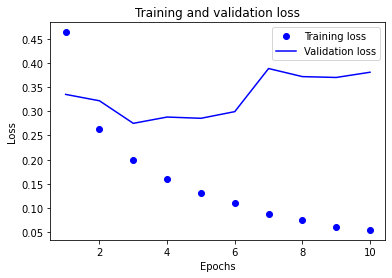

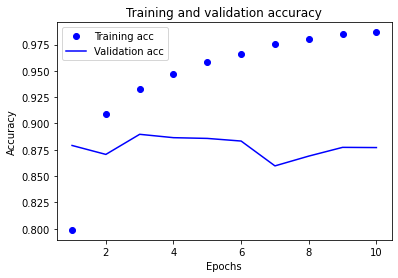

In [12]:
train(build_model(layer_count = 4, layer_size = 64), epochs = 10)

elapsed 3.89s
loss[0]: 0.1670626848936081, loss[-1]: 0.02421080507338047
accuracy[0]: 0.7871333360671997, accuracy[-1]: 0.9805999994277954
val_loss[0]: 0.12462185323238373, val_loss[-1]: 0.08706890046596527
val_accuracy[0]: 0.8636999726295471, val_accuracy[-1]: 0.8822000026702881


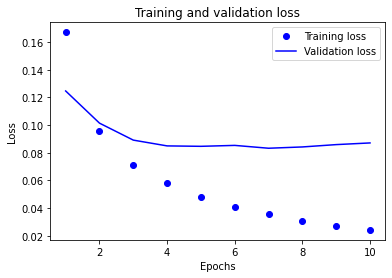

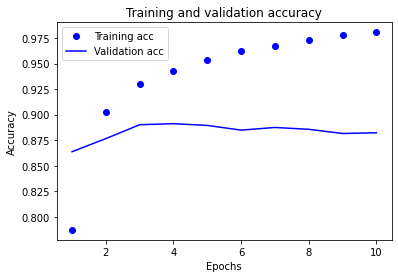

In [13]:
train(build_model(loss="mse"), epochs = 10)

elapsed 3.59s
loss[0]: 0.4700813293457031, loss[-1]: 0.04159213602542877
accuracy[0]: 0.791866660118103, accuracy[-1]: 0.987333357334137
val_loss[0]: 0.35382169485092163, val_loss[-1]: 0.47040337324142456
val_accuracy[0]: 0.8623999953269958, val_accuracy[-1]: 0.8687999844551086


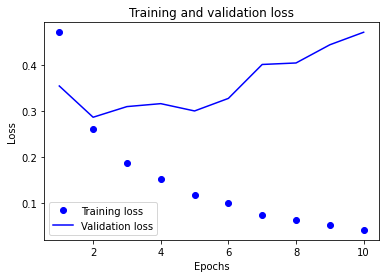

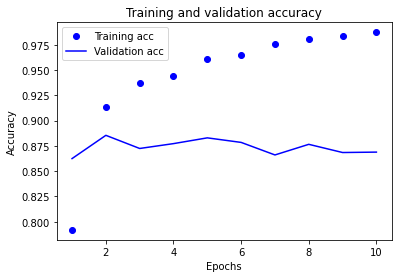

In [14]:
train(build_model(layer_count = 4, layer_size = 64, activation="tanh"), epochs = 10)